In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Superstore.csv')

In [3]:
df['month_year'] = pd.to_datetime(df['Order Date']).dt.to_period('M')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,month_year
0,1,CA-2018-152156,11/8/2018,11/11/2018,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2018-11
1,2,CA-2018-152156,11/8/2018,11/11/2018,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2018-11
2,3,CA-2018-138688,6/12/2018,6/16/2018,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2018-06
3,4,US-2017-108966,10/11/2017,10/18/2017,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2017-10
4,5,US-2017-108966,10/11/2017,10/18/2017,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2017-10


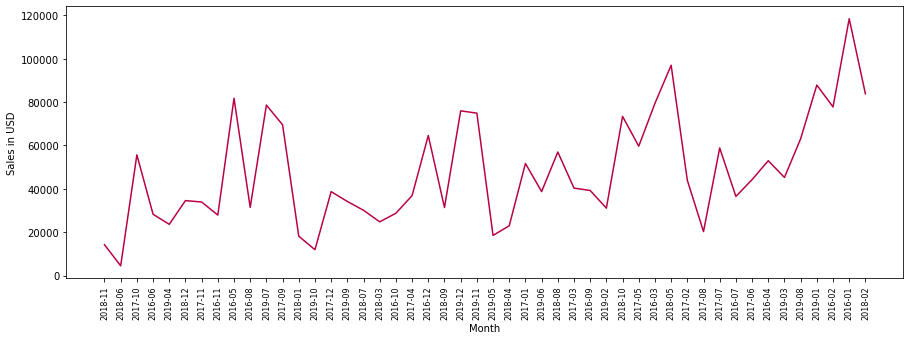

In [4]:
results = df.groupby('month_year').sum()
results
months = df.month_year.unique()
months = months.strftime('%Y-%m')
#plt.plot(months,results['Sales']) 
#df.head()
plt.figure(figsize=(15,5))
plt.plot(months,results['Sales'], color = '#b80045')
plt.xticks(months, rotation='vertical', size = 8)
plt.ylabel('Sales in USD')
plt.xlabel('Month')
plt.show()

In [ ]:
MoM_Data = pd.DataFrame(results['Sales'])
MoM_Data

In [ ]:
MoM_Data['Last_Month'] = np.roll(MoM_Data['Sales'],1)
MoM_Data

In [8]:
MoM_Data = MoM_Data.drop(MoM_Data.index[0])

In [ ]:
MoM_Data['Growth'] = (MoM_Data['Sales']/MoM_Data['Last_Month'])-1
MoM_Data.head()

In [30]:
results = MoM_Data.drop(columns = ["Sales", "Last_Month"])
results['Months'] = results.index
results.reset_index(drop=True, inplace=True)
#results['Months'] = results['Months'].strftime('%Y-%m')
results.head()
#results.info()

,Growth,Months
0,-0.682523,2016-02
1,11.321314,2016-03
2,-0.491923,2016-04
3,-0.164234,2016-05
4,0.462902,2016-06


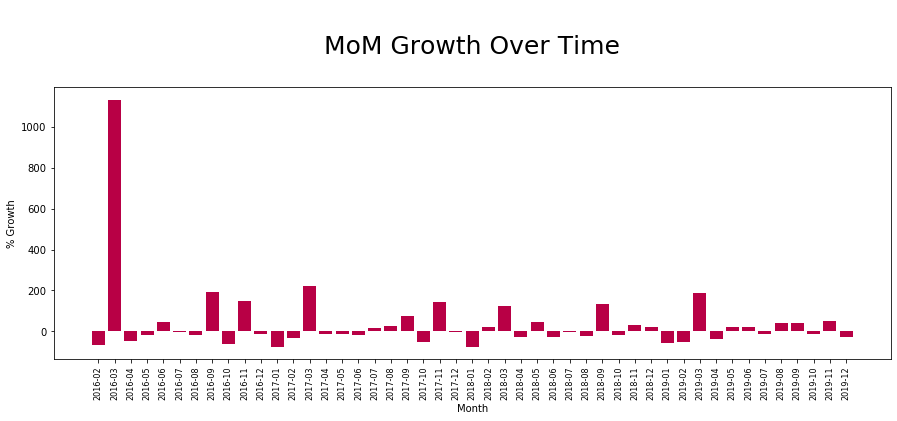

In [36]:
months = results.Months.unique()
months = months.strftime('%Y-%m')
plt.figure(figsize=(15,5))
plt.bar(months,results['Growth']*100, color = '#b80045')
plt.xticks(months, rotation='vertical', size = 8)
plt.ylabel('% Growth')
plt.xlabel('Month')
plt.title("\n MoM Growth Over Time \n", size=25)
#plt.grid()
plt.show()

In [43]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,month_year
0,1,CA-2018-152156,11/8/2018,11/11/2018,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,2018-11
1,2,CA-2018-152156,11/8/2018,11/11/2018,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,2018-11
2,3,CA-2018-138688,6/12/2018,6/16/2018,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714,2018-06


In [55]:
df['Qtr_Yr']=df['month_year'].dt.strftime('%F-Q%q')
df.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,month_year,Qtr_Yr
0,1,CA-2018-152156,11/8/2018,11/11/2018,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,2018-11,2018-Q4


In [56]:
results = df.groupby('Qtr_Yr').sum()

In [58]:
QoQ_Data = pd.DataFrame(results['Sales'])

QoQ_Data['Last_Qtr'] = np.roll(QoQ_Data['Sales'],1)
QoQ_Data
QoQ_Data = QoQ_Data.drop(QoQ_Data.index[0])

In [59]:
QoQ_Data['Growth'] = (QoQ_Data['Sales']/QoQ_Data['Last_Qtr'])-1
QoQ_Data.head()

,Sales,Last_Qtr,Growth
Qtr_Yr,,,
2016-Q2,86538.7596,74447.7960,0.162409
2016-Q3,143633.2123,86538.7596,0.659756
2016-Q4,179627.7302,143633.2123,0.250600
2017-Q1,68851.7386,179627.7302,-0.616698
2017-Q2,89124.1870,68851.7386,0.294436


In [60]:
results = QoQ_Data.drop(columns = ["Sales", "Last_Qtr"])
results['Quarter'] = results.index
results.reset_index(drop=True, inplace=True)
results.head()

,Growth,Quarter
0,0.162409,2016-Q2
1,0.659756,2016-Q3
2,0.250600,2016-Q4
3,-0.616698,2017-Q1
4,0.294436,2017-Q2


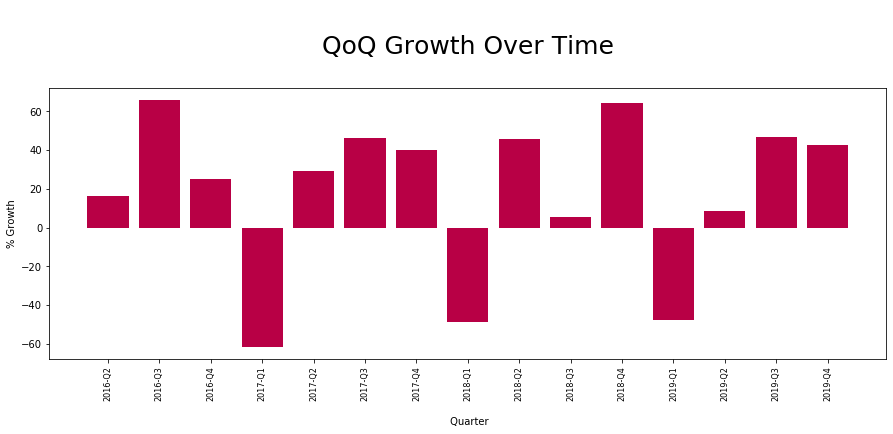

In [62]:
plt.figure(figsize=(15,5))
plt.bar(results['Quarter'],results['Growth']*100, color = '#b80045')
plt.xticks(results['Quarter'], rotation='vertical', size = 8)
plt.ylabel('% Growth')
plt.xlabel('\n Quarter')
plt.title("\n QoQ Growth Over Time \n", size=25)
#plt.grid()
plt.show()

In [64]:
YoY_Data = pd.DataFrame(df.groupby('month_year').sum()['Sales'])
YoY_Data['Last_Year'] = np.roll(YoY_Data['Sales'],12)

In [65]:
YoY_Data = YoY_Data.drop(YoY_Data.index[0:12])
YoY_Data.head()

,Sales,Last_Year
month_year,,
2017-01,18174.0756,14236.895
2017-02,11951.4110,4519.892
2017-03,38726.2520,55691.009
2017-04,34195.2085,28295.345
2017-05,30131.6865,23648.287


In [66]:
YoY_Data['Growth'] = (YoY_Data['Sales']/YoY_Data['Last_Year'])-1
YoY_Data.head()

,Sales,Last_Year,Growth
month_year,,,
2017-01,18174.0756,14236.895,0.276548
2017-02,11951.4110,4519.892,1.644181
2017-03,38726.2520,55691.009,-0.304623
2017-04,34195.2085,28295.345,0.208510
2017-05,30131.6865,23648.287,0.274159


In [67]:
results = YoY_Data.drop(columns = ["Sales", "Last_Year"])
results['month_year'] = results.index
results.reset_index(drop=True, inplace=True)
results.head()

,Growth,month_year
0,0.276548,2017-01
1,1.644181,2017-02
2,-0.304623,2017-03
3,0.208510,2017-04
4,0.274159,2017-05


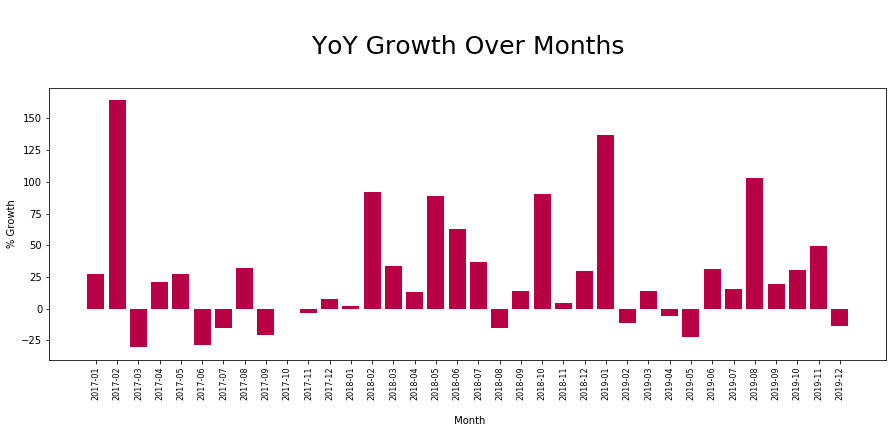

In [73]:
months = results.month_year.unique()
months = months.strftime('%Y-%m')
plt.figure(figsize=(15,5))
plt.bar(months,results['Growth']*100, color = '#b80045')
plt.xticks(months, rotation='vertical', size = 8)
plt.ylabel('% Growth')
plt.xlabel('\n Month')
plt.title("\n YoY Growth Over Months \n", size=25)
#plt.grid()
plt.show()

In [74]:
prod_sales = pd.DataFrame(df.groupby('Product Name').sum()['Sales'])
prod_sales.sort_values(by=['Sales'], inplace=True, ascending=False)

In [75]:
top_prods = prod_sales.head(10)
top_prods

,Sales
Product Name,
Canon imageCLASS 2200 Advanced Copier,61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,27453.384
Cisco TelePresence System EX90 Videoconferencing Unit,22638.480
HON 5400 Series Task Chairs for Big and Tall,21870.576
GBC DocuBind TL300 Electric Binding System,19823.479
GBC Ibimaster 500 Manual ProClick Binding System,19024.500
Hewlett Packard LaserJet 3310 Copier,18839.686
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",18374.895
GBC DocuBind P400 Electric Binding System,17965.068


In [76]:
best_selling_prods = pd.DataFrame(df.groupby('Product Name').sum()['Quantity'])
best_selling_prods.sort_values(by=['Quantity'], inplace=True, ascending=False)

#Calculating Top 5:
best_selling_prods = best_selling_prods.head(5)
best_selling_prods

,Quantity
Product Name,
Staples,215
Staple envelope,170
Easy-staple paper,150
Staples in misc. colors,86
KI Adjustable-Height Table,74


In [77]:
profitable_prods = pd.DataFrame(df.groupby('Product Name').sum()['Profit'])
profitable_prods.sort_values(by=['Profit'], inplace=True, ascending=False)

#Calculating Top 5:
profitable_prods = profitable_prods.head(5)
profitable_prods

,Profit
Product Name,
Canon imageCLASS 2200 Advanced Copier,25199.9280
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,7753.0390
Hewlett Packard LaserJet 3310 Copier,6983.8836
Canon PC1060 Personal Laser Copier,4570.9347
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",4094.9766
